# Triku vs other HVG selection methods on some datasets: 


In [1]:
import pandas as pd
import scanpy as sc
import os
from anndata import AnnData
from bs4 import BeautifulSoup
import requests
import subprocess
import GEOparse
import numpy as np
from tqdm.notebook import tqdm
import scallop as sl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib_venn import venn3, venn2, venn3_circles
import triku as tk

/home/olga/.local/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [39]:
def run_pipeline(adata):
    adata.var_names_make_unique()
    adata.var_names = [name.upper() for name in adata.var_names.tolist()]
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=5)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.pca(adata)
    sc.pp.highly_variable_genes(adata, n_bins=100)
    tk.tl.triku(adata, use_adata_knn=False)
    return adata

In [194]:
def plot_comparison(adata, markers):
#     color = ['red' if gene in markers else 'grey' for gene in adata.var_names]
#     size = [30 if gene in markers else 0.1 for gene in adata.var_names]
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    def plot_individual(ax, y_variable):
        size=0.3
        color='grey'
        marker = [f'${gene}$' for gene in adata.var_names if gene in markers]
        ax.scatter(adata.var['means'], adata.var[y_variable], s=size, color=color, alpha=0.5)
        ax.set_xlabel('Mean expression')
        ax.set_ylabel(y_variable)
        msizes = {m: 200*len(m) for m in markers}
        for marker in markers:
            x = adata[:, adata.var_names==marker].var['means']
            y = adata[:, adata.var_names==marker].var[y_variable]
            ax.scatter(x, y, s=msizes[marker], color='firebrick', alpha=1, marker=f'${marker}$', linewidth=0.1)
    for ax, y_var in zip([ax0, ax1, ax2, ax3], ['dispersions', 'dispersions_norm', 'triku_distance_uncorrected', 'triku_distance']):
        plot_individual(ax, y_variable=y_var)

In [ ]:
marker=r"$\mathsf{%s}$" % (t*'A'), markersize=10*t

## PBMC 3k

In [ ]:
pbmc = sc.datasets.pbmc3k()
pbmc = run_pipeline(pbmc)

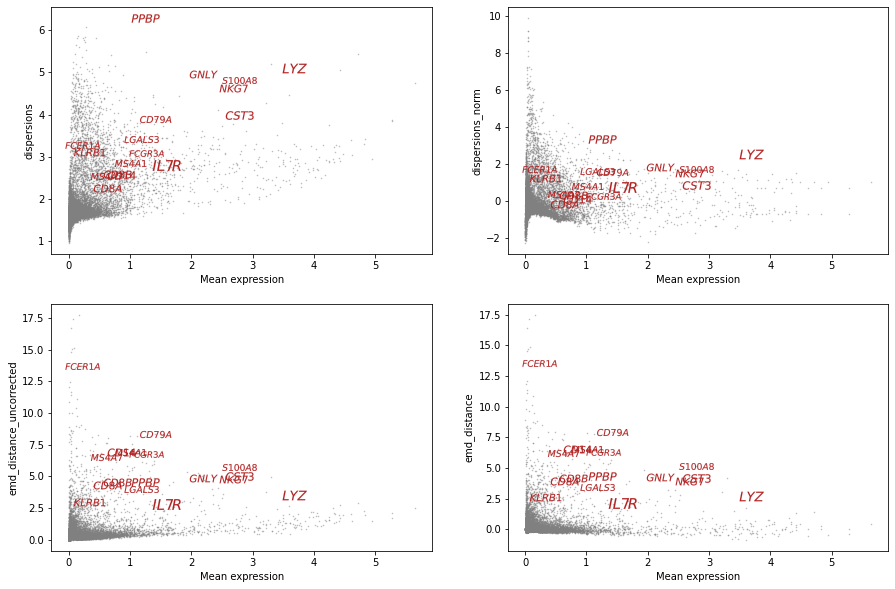

In [196]:
pbmc_markers = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
plot_comparison(pbmc, pbmc_markers)

## Joost 2016

In [40]:
joost = sc.read_csv('/home/olga/.local/lib/python3.8/site-packages/scallop/datasets/data/GSE67602_Joost_et_al_expression.txt', delimiter='\t').transpose()

In [ ]:
joost = run_pipeline(joost)

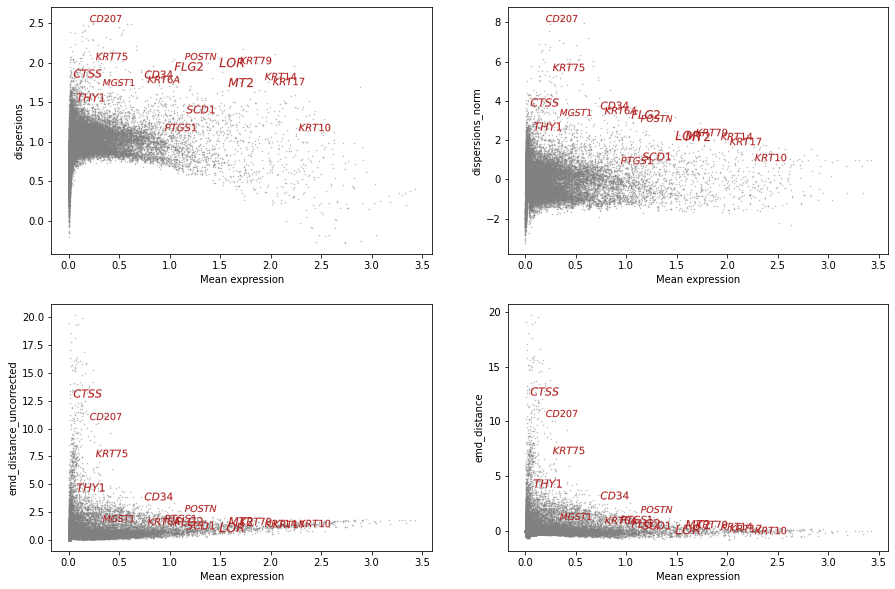

In [197]:
joost_markers = ['KRT14', 'MT2', 'KRT10', 'PTGS1', 'LOR', 'FLG2', 'KRT79', 'KRT17', 
                 'MGST1', 'SCD1', 'POSTN', 'CD34', 'KRT6A', 'KRT75', 'CD3', 'THY1', 'CD207', 'CTSS']
plot_comparison(joost, joost_markers)